In [1]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

/Users/pierluca/anaconda/envs/SVHNDetector/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "detector.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in /Users/pierluca/Documents/Pierluca/personal local/Dublin/DIT CPD/Deep Learning/assignment/SVHN_Detector/detector.h5


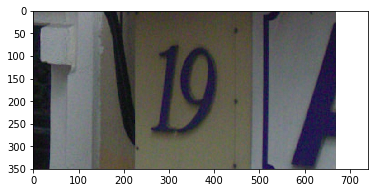

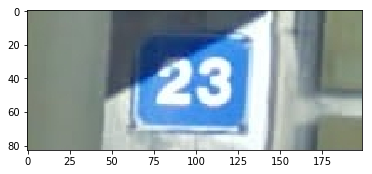

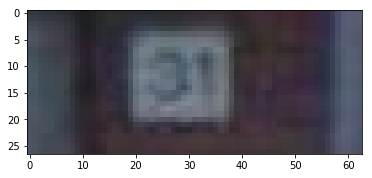

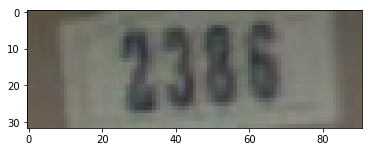

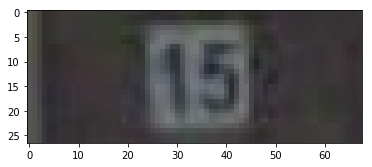

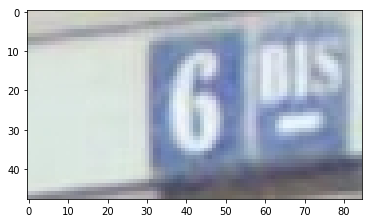

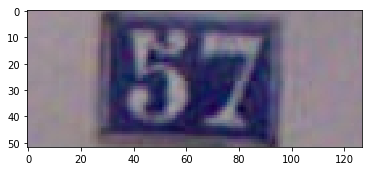

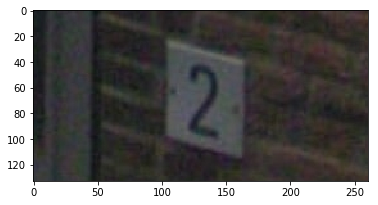

In [4]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), 
             os.path.join(DEFAULT_IMAGE_FOLDER, "2.png"),
             os.path.join(DEFAULT_IMAGE_FOLDER, "70.png"), 
             os.path.join(DEFAULT_IMAGE_FOLDER, "71.png"),
             os.path.join(DEFAULT_IMAGE_FOLDER, "72.png"),
             os.path.join(DEFAULT_IMAGE_FOLDER, "156.png"), 
             os.path.join(DEFAULT_IMAGE_FOLDER, "157.png"),
             os.path.join(DEFAULT_IMAGE_FOLDER, "158.png"),
            ]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

2-boxes are detected.


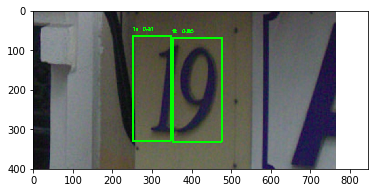

2-boxes are detected.


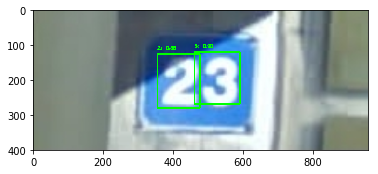

2-boxes are detected.


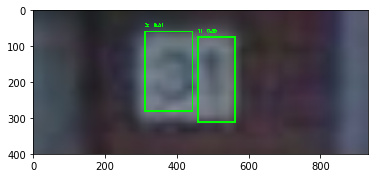

4-boxes are detected.


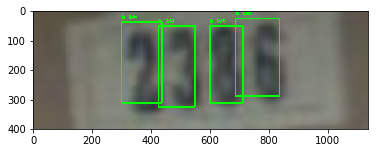

4-boxes are detected.


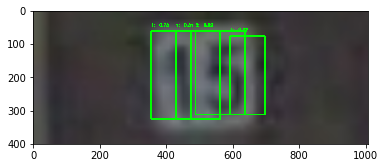

2-boxes are detected.


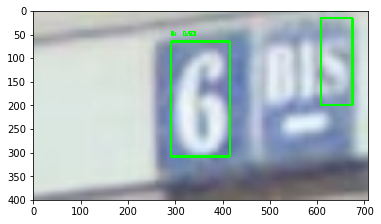

2-boxes are detected.


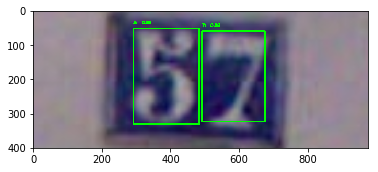

1-boxes are detected.


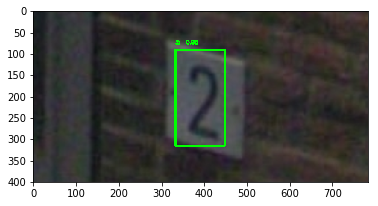

In [5]:
# 4. Predict digit region

THRESHOLD = 0.3
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()


In [6]:
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD) 
    print(boxes)

[[221  56 304 288]
 [308  62 418 290]]
[[0.         0.31198987 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.6494023 ]]
[[ 74  26  99  58]
 [ 96  25 123  56]]
[[0.        0.        0.848064  0.        0.        0.        0.
  0.        0.        0.       ]
 [0.        0.        0.        0.8997333 0.        0.        0.
  0.        0.        0.       ]]
[[21  4 30 19]
 [31  5 38 21]]
[[0.         0.         0.         0.30925903 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.34672186 0.         0.         0.         0.
  0.         0.         0.         0.        ]]
[[24  3 35 25]
 [55  2 67 23]
 [34  4 44 26]
 [48  4 57 25]]
[[0.         0.         0.8431454  0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.82310104 0.         0.         0

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation


input_shape = (32,32,3)
num_classes = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=3, 
                 input_shape=input_shape, 
                 padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, 3, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(128, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, 3, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.load_weights('predictor.h5')

#pred = model.predict(features_scaled)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


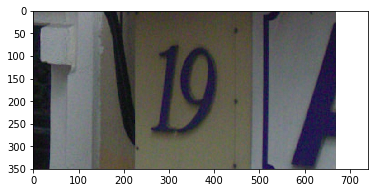

[[221  56 304 288]
 [308  62 418 290]]
[221  56 304 288]
[308  62 418 290]
number predicted is:  19


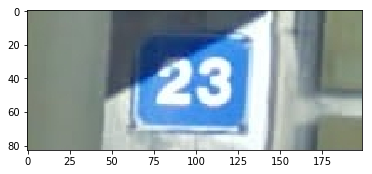

[[ 74  26  99  58]
 [ 96  25 123  56]]
[74 26 99 58]
[ 96  25 123  56]
number predicted is:  23


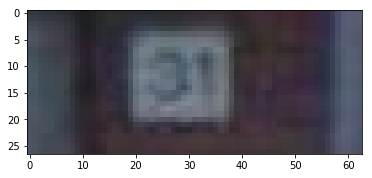

[[21  4 30 19]
 [31  5 38 21]]
[21  4 30 19]
[31  5 38 21]
number predicted is:  31


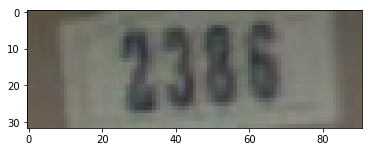

[[24  3 35 25]
 [55  2 67 23]
 [34  4 44 26]
 [48  4 57 25]]
[24  3 35 25]
[34  4 44 26]
[48  4 57 25]
[55  2 67 23]
number predicted is:  2386


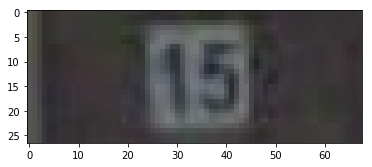

[[24  4 32 22]
 [29  4 38 22]
 [33  4 43 21]
 [40  5 47 21]]
[24  4 32 22]
[29  4 38 22]
[33  4 43 21]
[40  5 47 21]
number predicted is:  1351


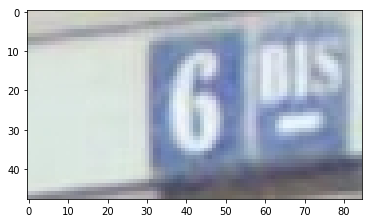

[[73  2 81 24]
 [35  8 50 37]]
[35  8 50 37]
[73  2 81 24]
number predicted is:  65


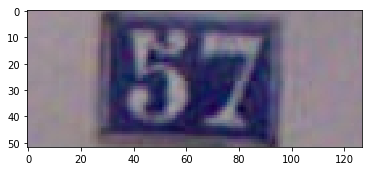

[[38  7 63 43]
 [64  8 88 42]]
[38  7 63 43]
[64  8 88 42]
number predicted is:  57


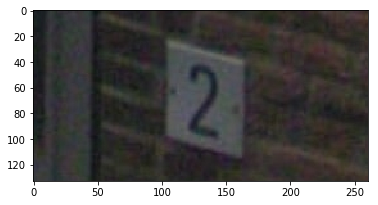

[[111  30 149 105]]
[111  30 149 105]
number predicted is:  2


In [10]:
from keras.preprocessing.image import img_to_array, array_to_img
import numpy as np

for img in imgs:
    plt.imshow(img)
    plt.show()
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    numbers_predicted = []
    print(boxes)
    
    def getKey(item):
        return item[0]
    
    for box in sorted(boxes,key=getKey):
        (x1,y1, x2, y2) = box
        print(box)
        image = array_to_img(img)
        stc = image.crop((x1,y1, x2, y2))
        stc = stc.resize((32,32))
        #plt.imshow(stc)
        #plt.show()
        stc = img_to_array(stc)
        stc = stc.astype('float32')
        stc /= 255
        pred = model.predict(stc.reshape(1,32,32,3))
        numbers_predicted.append(np.argmax(pred)+1)
    print ('number predicted is: ',''.join(str(x) for x in numbers_predicted))